In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
%matplotlib inline

## IBGE areas analysis
This jupyter notebook was made to analyze the data from IBGE related to the municipalities.
We'll focuses on:
- Data cleaning
- Getting information
    - Count municipalities by state
        - State with less municipalities
        - State with more municipalities
        - Visualizing
    - Area (km2) by state
        - State with less km2
        - State with more km2
        - Visualizing

________________________________________________________________________________

### Data cleaning
- Getting data -> shapefile with spatial information and xlsx with UF name
- Formatting data by UF
    - Count of municipalities
    - Area sum

#### First file
This file basically will provide almost everything that we need, so there is no much work on this

In [2]:
data_shape = gpd.read_file('br_municipios/BR_Municipios_2019.shp') #reading shapefile
data_shape.head(3) #visualiztion for the 3 lines of shapefile

,CD_MUN,NM_MUN,SIGLA_UF,AREA_KM2,geometry
0,1100015,Alta Floresta D'Oeste,RO,7067.025,"POLYGON ((-62.22630 -11.89037, -62.20670 -11.8..."
1,1100023,Ariquemes,RO,4426.571,"POLYGON ((-63.58751 -9.84984, -63.58715 -9.849..."
2,1100031,Cabixi,RO,1314.352,"POLYGON ((-60.71834 -13.39058, -60.70904 -13.3..."


In [3]:
data_shape.isnull().sum() #checking how many null values per column

CD_MUN      0
NM_MUN      0
SIGLA_UF    0
AREA_KM2    0
geometry    0
dtype: int64

#### Second file
Basically what we need from this file is the UF name, that is placed in the **NM_UF**, and we will also check if there is null values that may disturb our analysis and handle with that. The file is related for all municipalities(5568) from Brazil but, here we only need the 27 UF and Name from each state. 

In [4]:
data_xlsx = pd.read_excel('AR_BR_RG_UF_RGINT_RGIM_MES_MIC_MUN_2019.xls', sheet_name='AR_BR_MUN_2019')
data_xlsx.head(3)

,ID,CD_GCUF,NM_UF,NM_UF_SIGLA,CD_GCMUN,NM_MUN_2019,AR_MUN_2019
0,1.0,11.0,Rondônia,RO,1100015.0,ALTA FLORESTA D'OESTE,7067.025
1,2.0,11.0,Rondônia,RO,1100023.0,ARIQUEMES,4426.571
2,3.0,11.0,Rondônia,RO,1100031.0,CABIXI,1314.352


In [5]:
data_xlsx.shape #number of rows(municipalities) and columns respectively

(5575, 7)

In [6]:
data_xlsx.isnull().sum() #checking how many null values per column

ID             3
CD_GCUF        3
NM_UF          3
NM_UF_SIGLA    3
CD_GCMUN       3
NM_MUN_2019    3
AR_MUN_2019    2
dtype: int64

In [7]:
data_xlsx_with_no_null = data_xlsx[['NM_UF','NM_UF_SIGLA']].dropna() #cleaning the Null values
data_xlsx_uf_unique = data_xlsx_with_no_null.drop_duplicates() #cleaning the duplicate records since we only wnat the 27 states
data_xlsx_uf_unique.head()

,NM_UF,NM_UF_SIGLA
0,Rondônia,RO
52,Acre,AC
74,Amazonas,AM
136,Roraima,RR
151,Pará,PA


In [8]:
data_xlsx_uf_unique.shape #number of rows(states) and columns respectively

(27, 2)

#### Merging UF name to each municipality

In [9]:
data = pd.merge(data_shape, data_xlsx_uf_unique, left_on='SIGLA_UF', right_on='NM_UF_SIGLA') #merge both files
data.head(3) #checking the first 3 rows

,CD_MUN,NM_MUN,SIGLA_UF,AREA_KM2,geometry,NM_UF,NM_UF_SIGLA
0,1100015,Alta Floresta D'Oeste,RO,7067.025,"POLYGON ((-62.22630 -11.89037, -62.20670 -11.8...",Rondônia,RO
1,1100023,Ariquemes,RO,4426.571,"POLYGON ((-63.58751 -9.84984, -63.58715 -9.849...",Rondônia,RO
2,1100031,Cabixi,RO,1314.352,"POLYGON ((-60.71834 -13.39058, -60.70904 -13.3...",Rondônia,RO


In [10]:
data.drop('NM_UF_SIGLA', axis=1, inplace=True) #deleting the column 'NM_UF_SIGLA' because we already have this information.
data.head(3) #checking the first 3 rows

,CD_MUN,NM_MUN,SIGLA_UF,AREA_KM2,geometry,NM_UF
0,1100015,Alta Floresta D'Oeste,RO,7067.025,"POLYGON ((-62.22630 -11.89037, -62.20670 -11.8...",Rondônia
1,1100023,Ariquemes,RO,4426.571,"POLYGON ((-63.58751 -9.84984, -63.58715 -9.849...",Rondônia
2,1100031,Cabixi,RO,1314.352,"POLYGON ((-60.71834 -13.39058, -60.70904 -13.3...",Rondônia


In [11]:
data.shape #number of rows(municipalities) and columns respectively

(5572, 6)

#### Visualizing the shapefile

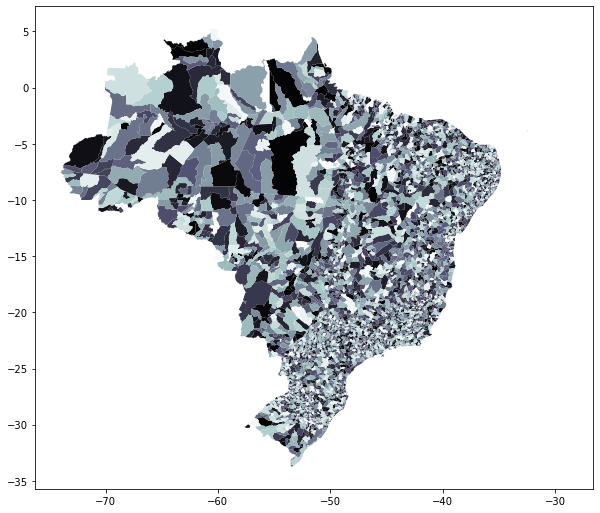

In [12]:
data.plot(column='NM_MUN' ,figsize=(10,10), cmap='bone')

_________________________________________________________

### Getting information
While answering the questions, we will format the file to later plot. For this task we'll dissolve the polygons by state thus we got only 27 polygons (representing the states) and a better visualization.

Here we'll create a new dataframe for each state and not for municipalitites anymore, thusly facilitate the visualization later.

In [25]:
data_to_dissolve = data[['SIGLA_UF','NM_UF','geometry']] #data to solve the polygons by state
data_uf = data_to_dissolve.dissolve(by='SIGLA_UF') #solving the polygons by state

In [26]:
data_uf.head(3)

,geometry,NM_UF
SIGLA_UF,,
AC,"POLYGON ((-68.38821 -11.04058, -68.38874 -11.0...",Acre
AL,"MULTIPOLYGON (((-35.75791 -9.69285, -35.75801 ...",Alagoas
AM,"POLYGON ((-58.14737 -7.34324, -58.14221 -7.349...",Amazonas


Now we can see cleary each state.

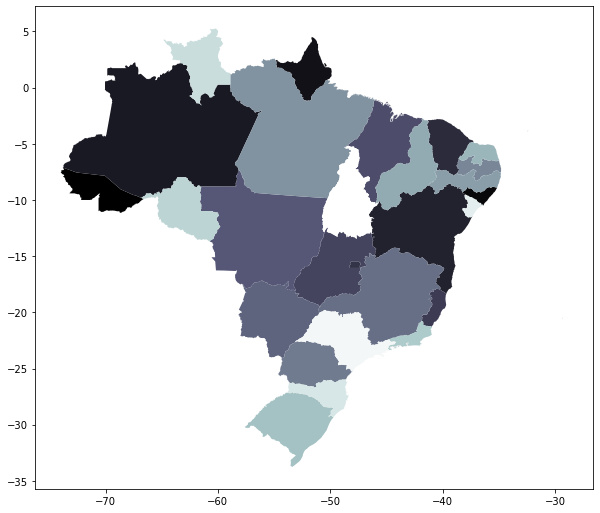

In [27]:
data_uf.plot(column='NM_UF', figsize=(10,10), cmap='bone')

In [28]:
data_uf.shape

(27, 2)

#### Count municipalities by state

In [29]:
data['NM_UF'].value_counts() #count of municipalities by state

Minas Gerais           853
São Paulo              645
Rio Grande do Sul      499
Bahia                  417
Paraná                 399
Santa Catarina         295
Goiás                  246
Piauí                  224
Paraíba                223
Maranhão               217
Pernambuco             185
Ceará                  184
Rio Grande do Norte    167
Pará                   144
Mato Grosso            141
Tocantins              139
Alagoas                102
Rio de Janeiro          92
Mato Grosso do Sul      79
Espirito Santo          78
Sergipe                 75
Amazonas                62
Rondônia                52
Acre                    22
Amapá                   16
Roraima                 15
Distrito Federal         1
Name: NM_UF, dtype: int64

Here we already got the answer of what state has more and less municipalities but, if we want a specific information we can do the following:

In [30]:
state_with_less_municipality = data['NM_UF'].value_counts().sort_values().head(1)
state_with_more_municipality = data['NM_UF'].value_counts().sort_values(ascending=False).head(1)

In [19]:
#state_with_more_municipality

In [31]:
print('The state {} is the one with less municipalities amount with: {}'.format(state_with_less_municipality.index[0],
                                                                               state_with_less_municipality.values[0]))
print('The state {} is the one with more municipalitites amount with: {}'.format(state_with_more_municipality.index[0],
                                                                                state_with_more_municipality.values[0]))

The state Distrito Federal is the one with less municipalities amount with: 1
The state Minas Gerais is the one with more municipalitites amount with: 853


In [32]:
count_municipality_by_state = data.groupby('NM_UF')['CD_MUN'].count()
count_municipality_by_state

NM_UF
Acre                    22
Alagoas                102
Amapá                   16
Amazonas                62
Bahia                  417
Ceará                  184
Distrito Federal         1
Espirito Santo          78
Goiás                  246
Maranhão               217
Mato Grosso            141
Mato Grosso do Sul      79
Minas Gerais           853
Paraná                 399
Paraíba                223
Pará                   144
Pernambuco             185
Piauí                  224
Rio Grande do Norte    167
Rio Grande do Sul      499
Rio de Janeiro          92
Rondônia                52
Roraima                 15
Santa Catarina         295
Sergipe                 75
São Paulo              645
Tocantins              139
Name: CD_MUN, dtype: int64

In [33]:
data_uf.head()

,geometry,NM_UF
SIGLA_UF,,
AC,"POLYGON ((-68.38821 -11.04058, -68.38874 -11.0...",Acre
AL,"MULTIPOLYGON (((-35.75791 -9.69285, -35.75801 ...",Alagoas
AM,"POLYGON ((-58.14737 -7.34324, -58.14221 -7.349...",Amazonas
AP,"MULTIPOLYGON (((-50.40986 0.62334, -50.42512 0...",Amapá
BA,"MULTIPOLYGON (((-38.69616 -17.97901, -38.69618...",Bahia


In [34]:
data_mun = pd.merge(data_uf, count_municipality_by_state, left_on='NM_UF', right_on='NM_UF') #merging information
data_mun.head(3)

,geometry,NM_UF,CD_MUN
0,"POLYGON ((-68.38821 -11.04058, -68.38874 -11.0...",Acre,22
1,"MULTIPOLYGON (((-35.75791 -9.69285, -35.75801 ...",Alagoas,102
2,"POLYGON ((-58.14737 -7.34324, -58.14221 -7.349...",Amazonas,62


#### Visualizing the municipalities presence by state

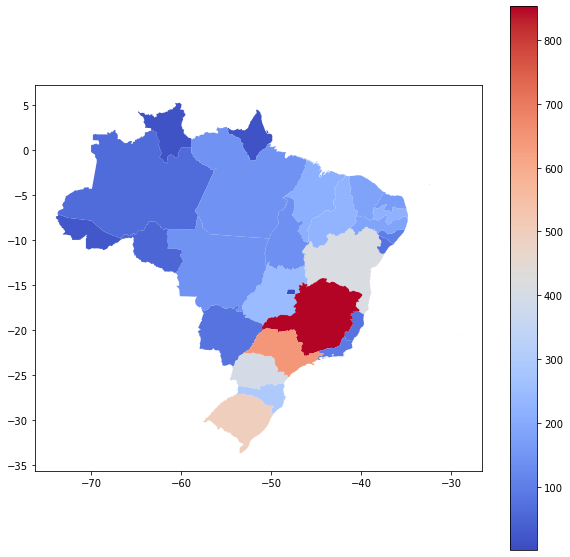

In [36]:
data_mun.plot(column='CD_MUN', figsize=(10,10), legend=True, cmap='coolwarm')

We can now visualize where we have more municipalities, on this case, the state of Minas Gerais is the one with more municipalitites.

#### Area (km2) by state

Back to the data_uf file, we can now analysis the area km2.

In [40]:
data.head(3)

,CD_MUN,NM_MUN,SIGLA_UF,AREA_KM2,geometry,NM_UF
0,1100015,Alta Floresta D'Oeste,RO,7067.025,"POLYGON ((-62.22630 -11.89037, -62.20670 -11.8...",Rondônia
1,1100023,Ariquemes,RO,4426.571,"POLYGON ((-63.58751 -9.84984, -63.58715 -9.849...",Rondônia
2,1100031,Cabixi,RO,1314.352,"POLYGON ((-60.71834 -13.39058, -60.70904 -13.3...",Rondônia


In [42]:
data.groupby('NM_UF')['AREA_KM2'].sum()

NM_UF
Acre                    164123.964
Alagoas                  27843.295
Amapá                   142470.762
Amazonas               1559167.889
Bahia                   564760.427
Ceará                   148894.441
Distrito Federal          5760.783
Espirito Santo           46074.447
Goiás                   340203.329
Maranhão                329642.182
Mato Grosso             903207.019
Mato Grosso do Sul      357145.534
Minas Gerais            586521.123
Paraná                  199298.979
Paraíba                  56467.242
Pará                   1245870.798
Pernambuco               98067.881
Piauí                   251756.515
Rio Grande do Norte      52809.602
Rio Grande do Sul       281707.156
Rio de Janeiro           43750.427
Rondônia                237765.240
Roraima                 223644.527
Santa Catarina           95730.684
Sergipe                  21925.424
São Paulo               248219.481
Tocantins               277466.763
Name: AREA_KM2, dtype: float64

Here we also got the answer of what state has more and less area coverage but, if we want a specific information we can do the following:

In [45]:
state_with_less_area = data.groupby('NM_UF')['AREA_KM2'].sum().sort_values(ascending=True).head(1)
state_with_more_area = data.groupby('NM_UF')['AREA_KM2'].sum().sort_values(ascending=False).head(1)

In [46]:
print('The state {} is the one with less area coverage with: {}'.format(state_with_less_area.index[0],
                                                                        state_with_less_area.values[0]))
print('The state {} is the one with more area coverage with: {}'.format(state_with_more_area.index[0],
                                                                        state_with_more_area.values[0]))

The state Distrito Federal is the one with less area coverage with: 5760.783
The state Amazonas is the one with more area coverage with: 1559167.8889999997


In [47]:
area_coverage_sum_by_state = data.groupby('NM_UF')['AREA_KM2'].sum()

In [49]:
data_uf = pd.merge(data_uf, area_coverage_sum_by_state, left_on='NM_UF', right_on='NM_UF') #merging information to plot
data_uf.head(3)

,geometry,NM_UF,AREA_KM2
0,"POLYGON ((-68.38821 -11.04058, -68.38874 -11.0...",Acre,164123.964
1,"MULTIPOLYGON (((-35.75791 -9.69285, -35.75801 ...",Alagoas,27843.295
2,"POLYGON ((-58.14737 -7.34324, -58.14221 -7.349...",Amazonas,1559167.889


#### Visualizing the area coverage by state

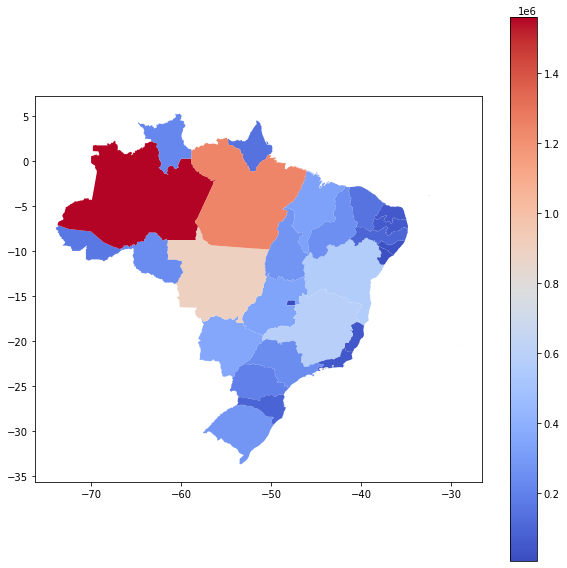

In [56]:
data_uf.plot(column='AREA_KM2', figsize=(10,10), legend=True, cmap='coolwarm')

______________________________________________________________________________________

#### Next steps
- Folium
- TomTom basemap
- Interactive map

#### Dependencies
- Pandas
- Geopandas
- xlrd